<a href="https://colab.research.google.com/github/MuxtorovAbubakr/MachineLearningProjects/blob/main/LogisticRegressionCodeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1

In [96]:
dataset = np.loadtxt('sample_data/ex2data1.txt', delimiter=',')

x_tr, y_tr = dataset[:, :2], dataset[:, -1]

In [97]:
class LogisticRegressionCode:
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.x_raw = x_train.copy()
        self.mu = np.mean(self.x_train, axis=0)
        self.sigma = np.std(self.x_train, axis=0)
        self.sigma[self.sigma == 0] = 1
        self.normalize()
        self.x1 = self.x_train[:, 0]
        self.x2 = self.x_train[:, 1]
        self.x_train = np.column_stack([self.x1, self.x2, self.x1 ** 2, self.x1 * self.x2, self.x2 ** 2])
        self.y_train = y_train
        self.learning_rate = 0.04
        self.weight = np.zeros(self.x_train.shape[1])
        self.bias = 0.0
        self.max_iter = 5000
        self.m = self.x_train.shape[0]
        self.LAM = 0.1
        self.cost_history = []
        self.gradient_descent()

    def normalize(self):
        self.x_train = (self.x_train - self.mu) / self.sigma

    def sigmoid_z(self):
        z = self.weight @ self.x_train.T + self.bias
        return 1 / (1 + np.exp(-z))

    def cost(self):
        return (-(1 / self.m) * np.sum(
            self.y_train * np.log(self.sigmoid_z()) +
            (1 - self.y_train) * np.log(1 - self.sigmoid_z())
        ) + (self.LAM / (2 * self.m)) * np.sum(self.weight ** 2))

    def error(self):
        return self.sigmoid_z() - self.y_train

    def gradient(self):
        dw = (1 / self.m) * self.error() @ self.x_train
        db = np.mean(self.error())
        return dw, db

    def gradient_descent(self):
        for _ in range(self.max_iter):
            self.cost_history.append(self.cost())
            dj_dw, dj_db = self.gradient()
            self.weight = self.weight - self.learning_rate * dj_dw
            self.bias = self.bias - self.learning_rate * dj_db

    def predict_sample(self, sample):
      sample = (sample - self.mu) / self.sigma
      x1 = sample[:, 0]
      x2 = sample[:, 1]
      sample_poly = np.column_stack([x1, x2, x1**2, x1*x2, x2**2])
      z = self.weight @ sample_poly.T + self.bias
      prob = 1 / (1 + np.exp(-z))
      if prob >= 0.5:
        print("Admitted")
      else:
        print("Not Admitted")

    def get_plots(self):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].scatter(self.x_raw[:, 0][self.y_train == 0], self.x_raw[:, 1][self.y_train == 0], label="Not Admitted", c='r', marker='x')
        ax[0].scatter(self.x_raw[:, 0][self.y_train == 1], self.x_raw[:, 1][self.y_train == 1], label="Admitted",c='g', marker='x')
        ax[0].set_xlabel('Exam 1 Score')
        ax[0].set_ylabel('Exam 2 Score')
        ax[0].legend()

        w1, w2, w3, w4 = self.weight[:4]

        xx = np.linspace(np.min(self.x_raw[:, 0]), np.max(self.x_raw[:, 0]), 400)
        yy = np.linspace(np.min(self.x_raw[:, 0]), np.max(self.x_raw[:, 0]), 400)
        X, Y = np.meshgrid(xx, yy)

        Xn = (X - self.mu[0]) / self.sigma[0]
        Yn = (Y - self.mu[1]) / self.sigma[1]
        F = w1 * Xn + w2 * Yn + w3 * (Xn ** 2) + w4 * (Yn ** 2) + self.bias

        ax[0].contour(X, Y, F, levels=[0])
        ax[0].set_aspect('equal', adjustable='datalim')


        ax[1].plot([i for i in range(self.max_iter)], self.cost_history)
        ax[1].set_xlabel('# Iterations')
        ax[1].set_ylabel('Cost')


        ax[2].text(0.2, 0.7, f"Cost: {self.cost_history[-1]}\n\nLearning Rate: {self.learning_rate}\n\nLam: {self.LAM}")
        ax[2].axis('off')
        plt.tight_layout()
        plt.show()

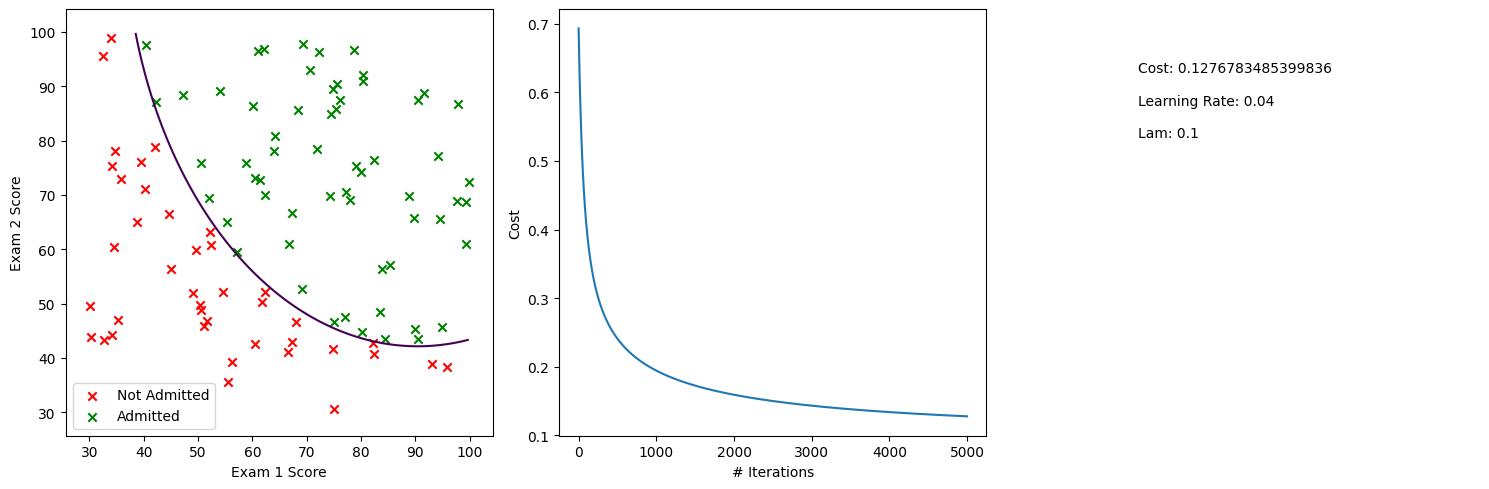

In [98]:
model = LogisticRegressionCode(x_tr, y_tr)
model.get_plots()

In [99]:
model.predict_sample(np.array([
    [80, 60]
]))

Admitted


In [100]:
model.predict_sample(np.array([
    [30, 30]
]))

Not Admitted


In [101]:
model.predict_sample(np.array([
    [0, 0]
]))

Not Admitted


In [102]:
model.predict_sample(np.array([
    [80, 40]
]))

Not Admitted


In [103]:
model.predict_sample(np.array([
    [90, 50]
]))

Admitted


# Assignment 2

In [104]:
dataset = np.loadtxt('sample_data/ex2data2.txt', delimiter=',')

x_train, y_train = dataset[:, :2], dataset[:, -1]

In [105]:
class LogisticRegressionCode2:
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.x_raw = x_train.copy()
        self.mu = np.mean(self.x_train, axis=0)
        self.sigma = np.std(self.x_train, axis=0)
        self.sigma[self.sigma == 0] = 1
        self.normalize()
        self.x1 = self.x_train[:, 0]
        self.x2 = self.x_train[:, 1]
        self.x_train = np.column_stack([self.x1, self.x2, self.x1 ** 2, self.x1 * self.x2, self.x2 ** 2])
        self.y_train = y_train
        self.learning_rate = 0.04
        self.weight = np.zeros(self.x_train.shape[1])
        self.bias = 0.0
        self.max_iter = 5000
        self.m = self.x_train.shape[0]
        self.LAM = 0.1
        self.cost_history = []
        self.gradient_descent()

    def normalize(self):
        self.x_train = (self.x_train - self.mu) / self.sigma

    def sigmoid_z(self):
        z = self.weight @ self.x_train.T + self.bias
        return 1 / (1 + np.exp(-z))

    def cost(self):
        return (-(1 / self.m) * np.sum(
            self.y_train * np.log(self.sigmoid_z()) +
            (1 - self.y_train) * np.log(1 - self.sigmoid_z())
        ) + (self.LAM / (2 * self.m)) * np.sum(self.weight ** 2))

    def error(self):
        return self.sigmoid_z() - self.y_train

    def gradient(self):
        dw = (1 / self.m) * self.error() @ self.x_train
        db = np.mean(self.error())
        return dw, db

    def gradient_descent(self):
        for _ in range(self.max_iter):
            self.cost_history.append(self.cost())
            dj_dw, dj_db = self.gradient()
            self.weight = self.weight - self.learning_rate * dj_dw
            self.bias = self.bias - self.learning_rate * dj_db

    def predict_sample(self, sample):
      sample = (sample - self.mu) / self.sigma
      x1 = sample[:, 0]
      x2 = sample[:, 1]
      sample_poly = np.column_stack([x1, x2, x1**2, x1*x2, x2**2])
      z = self.weight @ sample_poly.T + self.bias
      prob = 1 / (1 + np.exp(-z))
      if prob >= 0.5:
        print("Admitted")
      else:
        print("Not Admitted")

    def get_plots(self):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].scatter(self.x_raw[:, 0][self.y_train == 0], self.x_raw[:, 1][self.y_train == 0], label="Not Admitted", c='r', marker='x')
        ax[0].scatter(self.x_raw[:, 0][self.y_train == 1], self.x_raw[:, 1][self.y_train == 1], label="Admitted",c='g', marker='x')
        ax[0].set_xlabel('Exam 1 Score')
        ax[0].set_ylabel('Exam 2 Score')
        ax[0].legend()

        w1, w2, w3, w4, w5 = self.weight[:5]

        xx = np.linspace(np.min(self.x_raw[:, 0]), np.max(self.x_raw[:, 0]), 400)
        yy = np.linspace(np.min(self.x_raw[:, 0]), np.max(self.x_raw[:, 0]), 400)
        X, Y = np.meshgrid(xx, yy)

        Xn = (X - self.mu[0]) / self.sigma[0]
        Yn = (Y - self.mu[1]) / self.sigma[1]
        F = w1 * Xn + w2 * Yn + w3 * (Xn ** 2) + w4 * Xn*Yn + w5 * (Yn ** 2) + self.bias

        ax[0].contour(X, Y, F, levels=[0])
        ax[0].set_aspect('equal', adjustable='datalim')


        ax[1].plot([i for i in range(self.max_iter)], self.cost_history)
        ax[1].set_xlabel('# Iterations')
        ax[1].set_ylabel('Cost')


        ax[2].text(0.2, 0.7, f"Cost: {self.cost_history[-1]}\n\nLearning Rate: {self.learning_rate}\n\nLam: {self.LAM}")
        ax[2].axis('off')
        plt.tight_layout()
        plt.show()

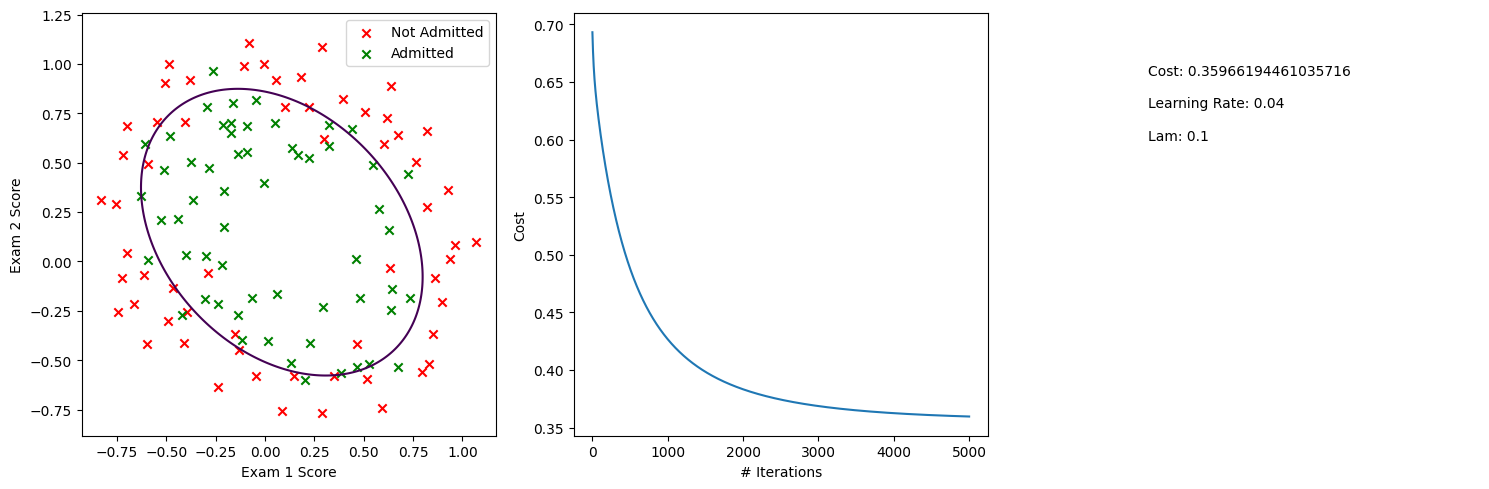

In [106]:
model2 = LogisticRegressionCode2(x_train, y_train)
model2.get_plots()